# General Universal Jastrow Factor Notes

In [29]:
from IPython.display import Markdown, display
from load_data import load_data_with_uncertainties
import numpy as np
from matplotlib import pyplot as plt


In [30]:
display(Markdown("todo"))

data I plan to include:

atomisation energies for N2, CN, C2
- just one or two of the methodologies?

binding curves for N2, for:
- universal Fournais Jastrow
- universal e-e only Jastrow
- universal e-e + e-n CASINO jastrow
- atomic Jastrow, no extra opt
- atomic Jastrow, en and een only, opt ee for molecule
- atomic Jastrow, en and een only, opt ee multidet casci for molecule? (not casscf to keep orbitals consistent with atom!)
- plot curve(s) with HEAT result as horizontal line to show that some of them are nonvariational
- check polynomial cutoff calculations:
  - /algpfs1/phaupt/neci/meanfield/bind/size_consistent/N2_universal_casino_eeLpolynomial*_s0/augccpvtz/2.08/


## Universal Jastrows

We have three options for the universal Jastrow
- Fournais
- e-e only
- e-e + CASINO e-n (orbital-dependent)

I am testing it with various options for the cutoffs, primarily polynomial and gaussians. We want to choose a universal Jastrow form (or two) to do the full N2 binding curve as well as some atomic calculations

### Cutoff Analysis

We want the cutoff values to be very small, so as to not affect the rest of the molecule, since it should only handle coalescence. We consider the polynomial cutoff $(1-r/L)^3$ and the gaussian cutoff $e^{-r^2/L^2}$.

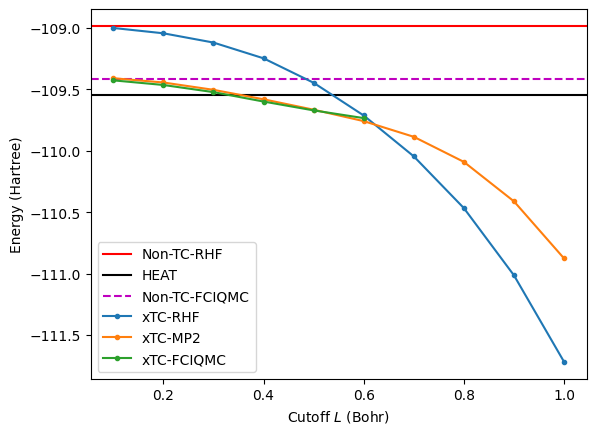

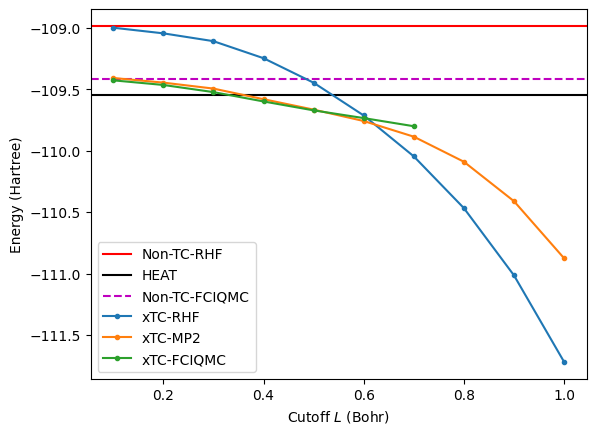

In [31]:
# gaussian cutoff data
data_gauss = load_data_with_uncertainties("data/universal_gauss_cutoff_energies.dat", uncertainty_cols=[3])
plt.axhline(y=-108.98408566080087, color='r', linestyle='-', label="Non-TC-RHF")
plt.axhline(y=-109.5425, color='k', linestyle='-', label="HEAT")
plt.axhline(y=-109.412216, color='m', linestyle='--', label="Non-TC-FCIQMC")
plt.plot(data_gauss[:,0], data_gauss[:,1], '.-', label="xTC-RHF")
plt.plot(data_gauss[:,0], data_gauss[:,2], '.-', label="xTC-MP2")
plt.plot(data_gauss[:,0], [x.n for x in data_gauss[:,3]], '.-', label="xTC-FCIQMC")
plt.xlabel(r"Cutoff $L$ (Bohr)")
plt.ylabel(r"Energy (Hartree)")
plt.legend()
plt.savefig("cutoffs_molecule.pdf")
plt.show()
data_gauss = load_data_with_uncertainties("data/universal_ee_gauss_cutoff_energies.dat", uncertainty_cols=[3])
plt.axhline(y=-108.98408566080087, color='r', linestyle='-', label="Non-TC-RHF")
plt.axhline(y=-109.5425, color='k', linestyle='-', label="HEAT")
plt.axhline(y=-109.412216, color='m', linestyle='--', label="Non-TC-FCIQMC")
plt.plot(data_gauss[:,0], data_gauss[:,1], '.-', label="xTC-RHF")
plt.plot(data_gauss[:,0], data_gauss[:,2], '.-', label="xTC-MP2")
plt.plot(data_gauss[:,0], [x.n for x in data_gauss[:,3]], '.-', label="xTC-FCIQMC")
plt.xlabel(r"Cutoff $L$ (Bohr)")
plt.ylabel(r"Energy (Hartree)")
plt.legend()
plt.savefig("cutoffs_ee_molecule.pdf")
plt.show()

Do a similar cutoff analysis for the atom...
`N_universal_casino_eeLgauss*_s3/augccpvtz/`

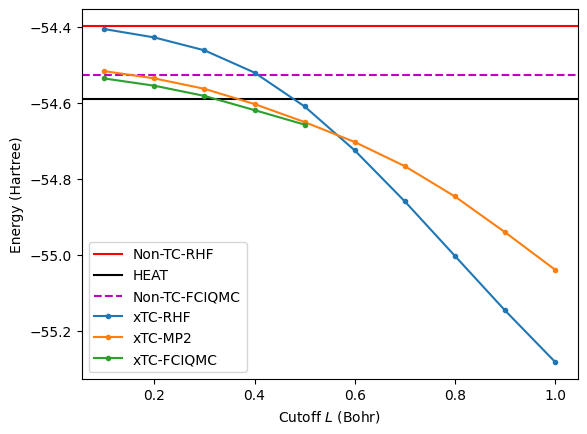

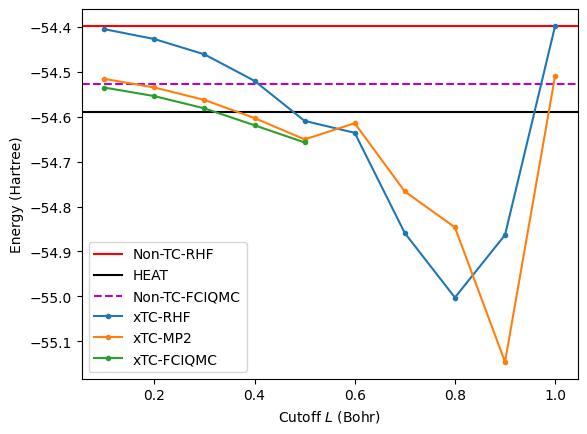

In [32]:
# gaussian cutoff data
data_gauss_at = load_data_with_uncertainties("data/universal_gauss_cutoff_atom_energies.dat", uncertainty_cols=[3])
plt.axhline(y=-54.397609522651592, color='r', linestyle='-', label="Non-TC-RHF")
plt.axhline(y=-54.5893, color='k', linestyle='-', label="HEAT")
plt.axhline(y=-54.527953, color='m', linestyle='--', label="Non-TC-FCIQMC")
plt.plot(data_gauss_at[:,0], data_gauss_at[:,1], '.-', label="xTC-RHF")
plt.plot(data_gauss_at[:,0], data_gauss_at[:,2], '.-', label="xTC-MP2")
plt.plot(data_gauss_at[:,0], [x.n for x in data_gauss_at[:,3]], '.-', label="xTC-FCIQMC")
plt.xlabel(r"Cutoff $L$ (Bohr)")
plt.ylabel(r"Energy (Hartree)")
plt.legend()
plt.savefig("cutoffs_atom.pdf")
plt.show()
data_gauss_at = load_data_with_uncertainties("data/universal_ee_gauss_cutoff_atom_energies.dat", uncertainty_cols=[3])
plt.axhline(y=-54.397609522651592, color='r', linestyle='-', label="Non-TC-RHF")
plt.axhline(y=-54.5893, color='k', linestyle='-', label="HEAT")
plt.axhline(y=-54.527953, color='m', linestyle='--', label="Non-TC-FCIQMC")
plt.plot(data_gauss_at[:,0], data_gauss_at[:,1], '.-', label="xTC-RHF")
plt.plot(data_gauss_at[:,0], data_gauss_at[:,2], '.-', label="xTC-MP2")
plt.plot(data_gauss_at[:,0], [x.n for x in data_gauss_at[:,3]], '.-', label="xTC-FCIQMC")
plt.xlabel(r"Cutoff $L$ (Bohr)")
plt.ylabel(r"Energy (Hartree)")
plt.legend()
plt.savefig("cutoffs_ee_atom.pdf")

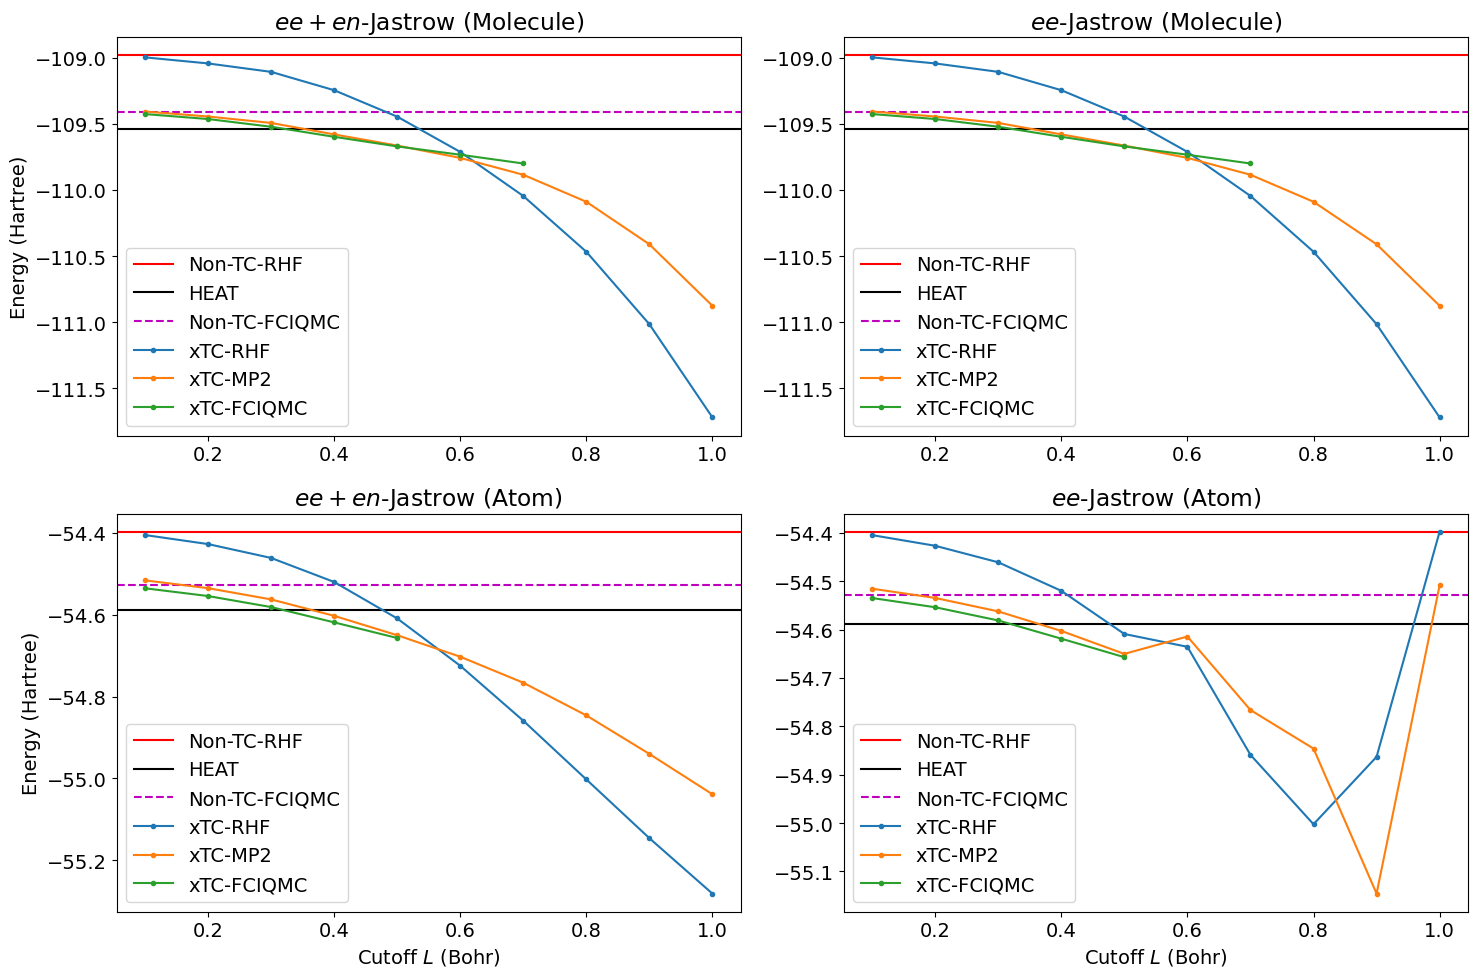

In [33]:
with plt.rc_context({'font.size': 14}):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # First plot
    axs[0, 0].axhline(y=-108.98408566080087, color='r', linestyle='-', label="Non-TC-RHF")
    axs[0, 0].axhline(y=-109.5425, color='k', linestyle='-', label="HEAT")
    axs[0, 0].axhline(y=-109.412216, color='m', linestyle='--', label="Non-TC-FCIQMC")
    axs[0, 0].plot(data_gauss[:,0], data_gauss[:,1], '.-', label="xTC-RHF")
    axs[0, 0].plot(data_gauss[:,0], data_gauss[:,2], '.-', label="xTC-MP2")
    axs[0, 0].plot(data_gauss[:,0], [x.n for x in data_gauss[:,3]], '.-', label="xTC-FCIQMC")
    axs[0, 0].set_ylabel(r"Energy (Hartree)")
    axs[0, 0].legend()
    axs[0, 0].set_title(r"$ee+en$-Jastrow (Molecule)")

    # Second plot
    data_gauss = load_data_with_uncertainties("data/universal_ee_gauss_cutoff_energies.dat", uncertainty_cols=[3])
    axs[0, 1].axhline(y=-108.98408566080087, color='r', linestyle='-', label="Non-TC-RHF")
    axs[0, 1].axhline(y=-109.5425, color='k', linestyle='-', label="HEAT")
    axs[0, 1].axhline(y=-109.412216, color='m', linestyle='--', label="Non-TC-FCIQMC")
    axs[0, 1].plot(data_gauss[:,0], data_gauss[:,1], '.-', label="xTC-RHF")
    axs[0, 1].plot(data_gauss[:,0], data_gauss[:,2], '.-', label="xTC-MP2")
    axs[0, 1].plot(data_gauss[:,0], [x.n for x in data_gauss[:,3]], '.-', label="xTC-FCIQMC")
    axs[0, 1].legend()
    axs[0, 1].set_title(r"$ee$-Jastrow (Molecule)")

    # Third plot
    data_gauss_at = load_data_with_uncertainties("data/universal_gauss_cutoff_atom_energies.dat", uncertainty_cols=[3])
    axs[1, 0].axhline(y=-54.397609522651592, color='r', linestyle='-', label="Non-TC-RHF")
    axs[1, 0].axhline(y=-54.5893, color='k', linestyle='-', label="HEAT")
    axs[1, 0].axhline(y=-54.527953, color='m', linestyle='--', label="Non-TC-FCIQMC")
    axs[1, 0].plot(data_gauss_at[:,0], data_gauss_at[:,1], '.-', label="xTC-RHF")
    axs[1, 0].plot(data_gauss_at[:,0], data_gauss_at[:,2], '.-', label="xTC-MP2")
    axs[1, 0].plot(data_gauss_at[:,0], [x.n for x in data_gauss_at[:,3]], '.-', label="xTC-FCIQMC")
    axs[1, 0].set_xlabel(r"Cutoff $L$ (Bohr)")
    axs[1, 0].set_ylabel(r"Energy (Hartree)")
    axs[1, 0].legend()
    axs[1, 0].set_title(r"$ee+en$-Jastrow (Atom)")

    # Fourth plot
    data_gauss_at = load_data_with_uncertainties("data/universal_ee_gauss_cutoff_atom_energies.dat", uncertainty_cols=[3])
    axs[1, 1].axhline(y=-54.397609522651592, color='r', linestyle='-', label="Non-TC-RHF")
    axs[1, 1].axhline(y=-54.5893, color='k', linestyle='-', label="HEAT")
    axs[1, 1].axhline(y=-54.527953, color='m', linestyle='--', label="Non-TC-FCIQMC")
    axs[1, 1].plot(data_gauss_at[:,0], data_gauss_at[:,1], '.-', label="xTC-RHF")
    axs[1, 1].plot(data_gauss_at[:,0], data_gauss_at[:,2], '.-', label="xTC-MP2")
    axs[1, 1].plot(data_gauss_at[:,0], [x.n for x in data_gauss_at[:,3]], '.-', label="xTC-FCIQMC")
    axs[1, 1].set_xlabel(r"Cutoff $L$ (Bohr)")
    axs[1, 1].legend()
    axs[1, 1].set_title(r"$ee$-Jastrow (Atom)")

    plt.tight_layout()
    plt.savefig("cutoffs_combined.pdf")

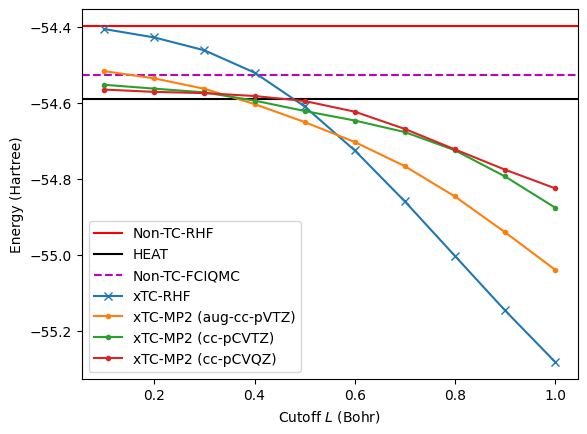

In [34]:
data_cvtz = np.genfromtxt("data/cvtz.dat")
data_cvqz = np.genfromtxt("data/cvqz.dat")
data_augcvtz = np.genfromtxt("data/augccpcvtz.dat")
data_gauss_at = load_data_with_uncertainties("data/universal_gauss_cutoff_atom_energies.dat", uncertainty_cols=[3])
plt.axhline(y=-54.397609522651592, color='r', linestyle='-', label="Non-TC-RHF")
plt.axhline(y=-54.5893, color='k', linestyle='-', label="HEAT")
plt.axhline(y=-54.527953, color='m', linestyle='--', label="Non-TC-FCIQMC")
# rhf value is basically the same for all
plt.plot(data_gauss_at[:,0], data_gauss_at[:,1], 'x-', label="xTC-RHF")
# plt.plot(data_gauss_at[:,0], data_gauss_at[:,1], 'x-', label="xTC-RHF (aug-cc-pVTZ)")
plt.plot(data_gauss_at[:,0], data_gauss_at[:,2], '.-', label="xTC-MP2 (aug-cc-pVTZ)")
# plt.plot(data_cvtz[:,0], data_cvtz[:,1], 'x-', label="xTC-RHF (cc-pCVTZ)")
plt.plot(data_cvtz[:,0], data_cvtz[:,2], '.-', label="xTC-MP2 (cc-pCVTZ)")
# plt.plot(data_cvqz[:,0], data_cvqz[:,1], 'x-', label="xTC-RHF (cc-pCVTZ)")
plt.plot(data_cvqz[:,0], data_cvqz[:,2], '.-', label="xTC-MP2 (cc-pCVQZ)")
# plt.plot(data_augcvtz[:,0], data_augcvtz[:,1], '.-', label="xTC-RHF (aug-cc-pCVTZ)")
# plt.plot(data_augcvtz[:,0], data_augcvtz[:,2], '.-', label="xTC-MP2 (aug-cc-pCVTZ)")
plt.ylabel(r"Energy (Hartree)")
plt.xlabel(r"Cutoff $L$ (Bohr)")
plt.legend()
plt.savefig("cutoffs_basis.pdf", bbox_inches='tight')
# plt.set_title(r"$ee+en$-Jastrow (Molecule)")


Since L=0.1 seems to hardly make any difference when compared against non-TC, I am cancelling the curves I am running for that and am running the binding curves for L=0.3.

TODO 
running (only reference energies) for the ccpv*C*Xz calculations, i.e. including core-valence correlation, to see if it makes a difference

also for fournais jastrow here:
/algpfs1/phaupt/neci/meanfield/bind/size_consistent/N_gauss0.3_universal_combinedTrue_s3/ccpcvdz/0.0/03_tchint/slurm-728542.out

now also with aug-cc-pcvtz
/algpfs1/phaupt/neci/meanfield/bind/size_consistent/N_universal_casino_fullcurve_eeLgaussian1.0_s3/augccpcvtz/0.0/03_tchint
/algpfs1/phaupt/neci/meanfield/bind/size_consistent/N_gauss0.3_universal_combinedTrue_s3/augccpcvtz/0.0/03_tchint

### Binding Curves

We continue with L=0.3 Gaussian cutoffs, and run the avtz N2 binding curve for the three different universal Jastrow variants

Doing this for the Fournais Jastrow gives nonvariational results. I guess I have to do a cutoff analysis for all of them.

I will do a cutoff analysis of the ee-only Jastrow, using CASINO. Fournais I'm not sure. Maybe just don't include for simplicity (plus three-body coalescence should be less significant)?

Running cutoff analysis for ee-only Jastrow
`/algpfs1/phaupt/neci/meanfield/bind/size_consistent/N_universal_casino_nocusp_eeLgaussian0.8_s3/augccpvtz/0.0/04_fciqmc/walker_3e+05` etc

trying the Fournais Jastrow with L=0.1 just to see what happens:
`/algpfs1/phaupt/neci/meanfield/bind/size_consistent/N2_gauss0.1_universal_combinedTrue_s0/augccpvtz/2.08/03_tchint`
- it's bad, so mention it in the thesis, but can't rule out numerics

running ee-only binding curve for L=0.3 Bohr

Since CASCI is size inconsistent even without TC, I am redoing it with FCIQMC-Jastrows for the ee multidet opt
- /algpfs1/phaupt/neci/meanfield/bind/size_consistent/N2_atom_optee_enL1_C3_nd1_s0_fciqmc_nd100/augccpvtz

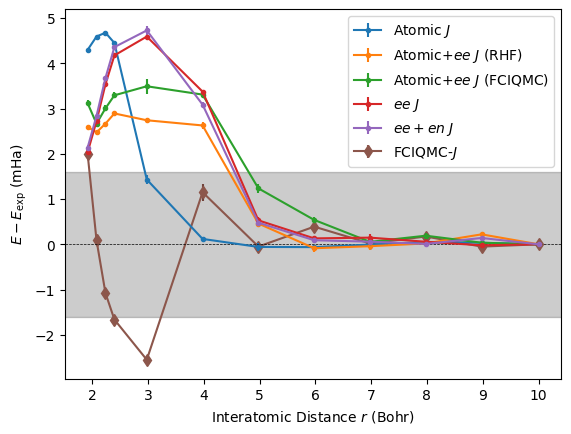

In [35]:
experiment = np.genfromtxt("data/n2_experiment.dat")

comp2exp = lambda x: (x - x[-1]) - (experiment[:,1] - experiment[-1,1])
plot_comp2exp = lambda x,t: plt.errorbar(experiment[:,0], [1000*x.n for x in comp2exp(x)], yerr=[1000*x.s for x in comp2exp(x)], fmt='.-', label=t)

atomicJmol = load_data_with_uncertainties("data/n2_avtz_atomic.dat", uncertainty_cols=[1])
plot_comp2exp(atomicJmol[:,1], r"Atomic $J$")
atomicEeJmol = load_data_with_uncertainties("data/n2_avtz_atomic_eeOpt_fromatom.dat", uncertainty_cols=[1])
plot_comp2exp(atomicEeJmol[:,1], r"Atomic$+ee$ $J$ (RHF)")
atomicEeMdJmol = load_data_with_uncertainties("data/n2_avtz_atomic_eeOpt_fromatom_fciqmc.dat", uncertainty_cols=[1])
plot_comp2exp(atomicEeMdJmol[:,1], r"Atomic$+ee$ $J$ (FCIQMC)")
eeJmol = load_data_with_uncertainties("data/n2_avtz_ee.dat", uncertainty_cols=[1])
plot_comp2exp(eeJmol[:,1], r"$ee$ $J$")
eeEnJmol = load_data_with_uncertainties("data/n2_avtz_ee_en.dat", uncertainty_cols=[1])
plot_comp2exp(eeEnJmol[:,1], r"$ee+en$ $J$")
fciqmcJmol = load_data_with_uncertainties("data/N2_avtz_fciqmc.dat", uncertainty_cols=[1])
# plot_comp2exp(eeEnJmol[:,1], r"FCIQMC-$J$")
plt.errorbar(experiment[:,0], [1000*x.n for x in comp2exp(fciqmcJmol[:,1])], yerr=[1000*x.s for x in comp2exp(fciqmcJmol[:,1])], fmt='d-', label=r'FCIQMC-$J$', zorder=1)

plt.legend()
xlim = plt.xlim()
ylim = plt.ylim()
plt.fill_between([min(experiment[:,0])-10, max(experiment[:,0])+10], -1.6, +1.6, alpha=0.2, color='k')
plt.axline((-100,0), (100,0), color='k', linestyle='--', linewidth=0.5)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(r"Interatomic Distance $r$ (Bohr)")
plt.ylabel(r"$E-E_{\rm exp}$ (mHa)")

plt.savefig("residuals.pdf")

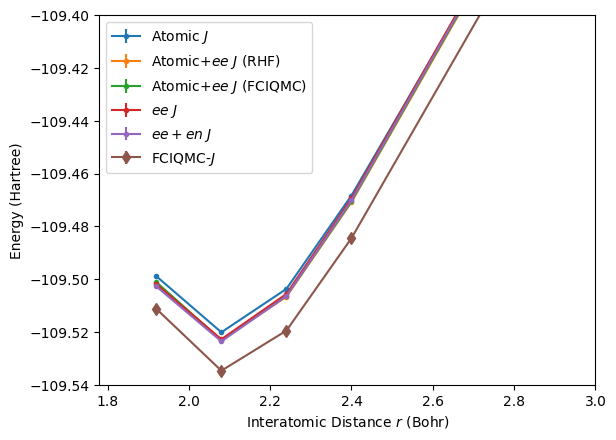

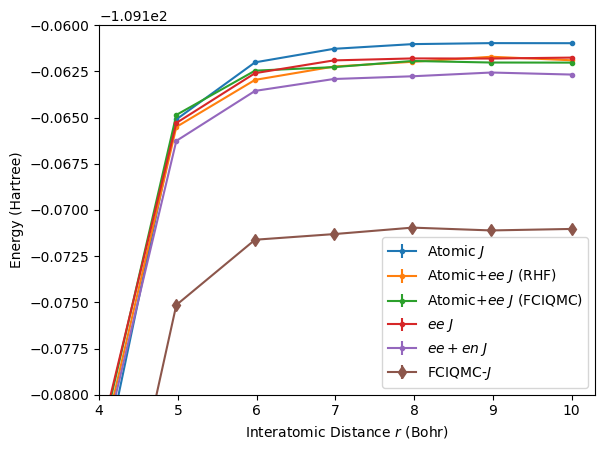

In [36]:

plt.errorbar(atomicJmol[:,0], [x.n for x in atomicJmol[:,1]], yerr=[x.s for x in atomicJmol[:,1]], fmt='.-', label="Atomic $J$")
plt.errorbar(atomicEeJmol[:,0], [x.n for x in atomicEeJmol[:,1]], yerr=[x.s for x in atomicEeJmol[:,1]], fmt='.-', label="Atomic$+ee$ $J$ (RHF)")
plt.errorbar(atomicEeMdJmol[:,0], [x.n for x in atomicEeMdJmol[:,1]], yerr=[x.s for x in atomicEeMdJmol[:,1]], fmt='.-', label="Atomic$+ee$ $J$ (FCIQMC)")
plt.errorbar(eeJmol[:,0], [x.n for x in eeJmol[:,1]], yerr=[x.s for x in eeJmol[:,1]], fmt='.-', label="$ee$ $J$")
plt.errorbar(eeEnJmol[:,0], [x.n for x in eeEnJmol[:,1]], yerr=[x.s for x in eeEnJmol[:,1]], fmt='.-', label="$ee+en$ $J$")
plt.errorbar(fciqmcJmol[:,0], [x.n for x in fciqmcJmol[:,1]], yerr=[x.s for x in fciqmcJmol[:,1]], fmt='d-', label="FCIQMC-$J$", zorder=1)
plt.legend()

xi, xf = 1.78, 3
yi, yf = -109.54, -109.4

# xi, xf = 4, 10.3
# yi, yf = -109.186, -109.165
plt.xlim(xi, xf)
plt.ylim(yi, yf)

plt.xlabel(r"Interatomic Distance $r$ (Bohr)")
plt.ylabel(r"Energy (Hartree)")
plt.savefig("n2_avtz_min.pdf", bbox_inches='tight')

plt.show()

plt.errorbar(atomicJmol[:,0], [x.n for x in atomicJmol[:,1]], yerr=[x.s for x in atomicJmol[:,1]], fmt='.-', label="Atomic $J$")
plt.errorbar(atomicEeJmol[:,0], [x.n for x in atomicEeJmol[:,1]], yerr=[x.s for x in atomicEeJmol[:,1]], fmt='.-', label="Atomic$+ee$ $J$ (RHF)")
plt.errorbar(atomicEeMdJmol[:,0], [x.n for x in atomicEeMdJmol[:,1]], yerr=[x.s for x in atomicEeMdJmol[:,1]], fmt='.-', label="Atomic$+ee$ $J$ (FCIQMC)")
plt.errorbar(eeJmol[:,0], [x.n for x in eeJmol[:,1]], yerr=[x.s for x in eeJmol[:,1]], fmt='.-', label="$ee$ $J$")
plt.errorbar(eeEnJmol[:,0], [x.n for x in eeEnJmol[:,1]], yerr=[x.s for x in eeEnJmol[:,1]], fmt='.-', label="$ee+en$ $J$")
plt.errorbar(fciqmcJmol[:,0], [x.n for x in fciqmcJmol[:,1]], yerr=[x.s for x in fciqmcJmol[:,1]], fmt='d-', label="FCIQMC-$J$", zorder=1)
plt.legend()

# xi, xf = 1.78, 3
# yi, yf = -109.54, -109.4

xi, xf = 4, 10.3
yi, yf = -109.18, -109.16
plt.xlim(xi, xf)
plt.ylim(yi, yf)

plt.xlabel(r"Interatomic Distance $r$ (Bohr)")
plt.ylabel(r"Energy (Hartree)")
plt.savefig("n2_avtz_diss.pdf", bbox_inches='tight')

plt.show()

TODO : also include a size consistency comparison for all curves like done in previous chapter

### Atomisation Energies

In [37]:
import pandas as pd
from load_data import format_ufloat, col2ufloat, display_formatted, get_system_values
import matplotlib.pyplot as plt

In [38]:
df_notc = get_system_values("data/atomisation_nontc.csv")
df_full = get_system_values("data/atomisation_fulltc.csv")
# df_Aee = get_system_values("data/atomisation_atomic_ee.csv")
df_Aee2 = get_system_values("data/atomisation_atomic_ee_fromatom.csv")
df_uni = get_system_values("data/atomisation_universal_ee_en.csv")

In [39]:
# df = df_full.copy()

def get_diffdf(dfin):
    df = dfin.copy()
    df = df.set_index('system').T

    diffdict = {}
    diffdict["N2"] = 1000 * (2 * df["N"] - df["N2"])
    diffdict["C2"] = 1000 * (2 * df["C"] - df["C2"])
    diffdict["O2"] = 1000 * (2 * df["O"] - df["O2"])
    diffdict["CN"] = 1000 * (df["C"] + df["N"] - df["CN"])
    diffdict["norb"] = [28, 60, 110]
    return pd.DataFrame(diffdict)


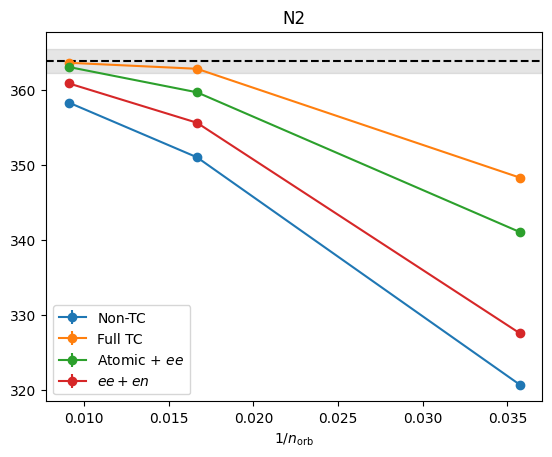

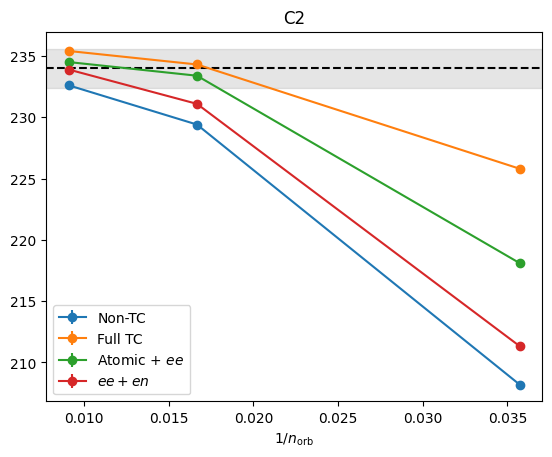

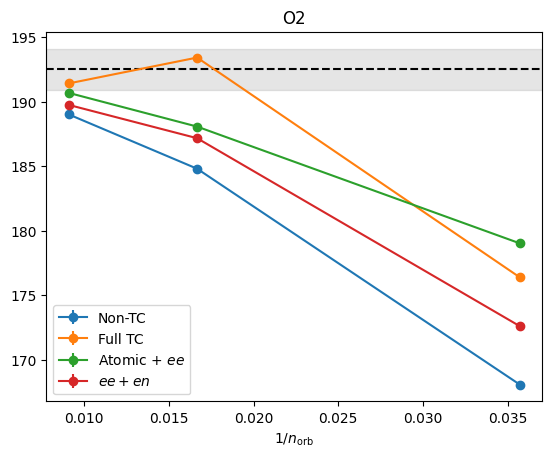

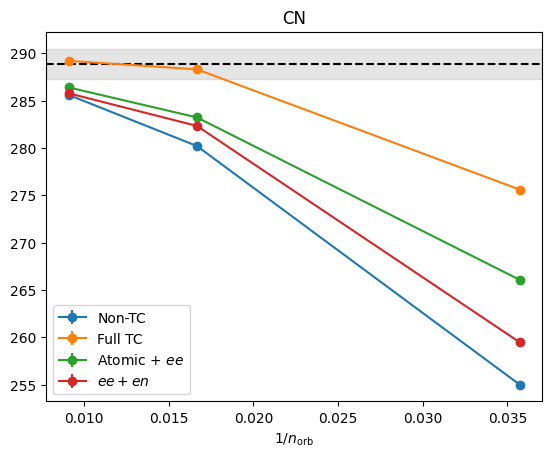

In [40]:
diff_notc = get_diffdf(df_notc)
diff_full = get_diffdf(df_full)
# diff_Aee = get_diffdf(df_Aee)
diff_Aee2 = get_diffdf(df_Aee2)
diff_uni = get_diffdf(df_uni)
# display_formatted(pd.DataFrame(diffdict))
# diffdf = pd.DataFrame(diffdict)
exact = {
    "N2": 363.9,
    "CN": 288.9,
    "C2": 234.0,
    "O2": 192.5
}

# TODO I clearly made an input error for the atomic + ee calculations
# --- notice that the N2 values disagree with that from the binding curve, makes no sense!
# --- or is it somehow possible that we absolutely need augmented functions? Seems unlikely
# --- might be worth checking that you are using the right units
# --- also check universal ee+en calculations, at least for vqz

norb_rec = [1/n for n in diff_full["norb"]]
for system in diff_full.keys():
    if system == "norb": continue
    plt.errorbar(norb_rec, [x.n for x in diff_notc[system]], yerr=[x.s for x in diff_notc[system]], fmt='o-', label="Non-TC")
    plt.errorbar(norb_rec, [x.n for x in diff_full[system]], yerr=[x.s for x in diff_full[system]], fmt='o-', label="Full TC")
    # plt.errorbar(norb_rec, [x.n for x in diff_Aee[system]], yerr=[x.s for x in diff_Aee[system]], fmt='o-', label=r"Atomic($n$) + $ee$")
    plt.errorbar(norb_rec, [x.n for x in diff_Aee2[system]], yerr=[x.s for x in diff_Aee2[system]], fmt='o-', label=r"Atomic + $ee$")
    plt.errorbar(norb_rec, [x.n for x in diff_uni[system]], yerr=[x.s for x in diff_uni[system]], fmt='o-', label=r"$ee+en$")
    plt.axhline(exact[system], color="black", linestyle="--")
    plt.axhspan(exact[system]-1.6, exact[system]+1.6, alpha=0.2, color='gray')
    plt.legend()
    plt.xlabel(r"$1/n_{\rm orb}$")
    plt.title(system)
    plt.show()
    # print(system)
    # print(diff_full[diff_full["system"] == system])
# print([x.n for x in diffdf["N2"]])
# plt.errorbar(norb_rec, [x.n for x in diffdf["N2"]], yerr=[x.s for x in diffdf["N2"]])

In [41]:
def diff_print4latex(diffdf):
    for p in diffdf.keys()[:-1]:
        print(p)
        for b in diffdf[p].keys():
            print(f"{diffdf[p][b].n:.1f}", end=' & ')
        print()
        for b in diffdf[p].keys():
            print(f"{diffdf[p][b].s:.1f}", end=' & ')
        print()
        # print(diff_Aee2[p], end=' & ')
def df_print4latex(df):
    for p in df["system"]:
        print(f"{p}")
        tmpdf = df[df["system"]==p]
        # print(tmpdf["vdz"])
        print(f"{tmpdf["vdz"].iloc[0].n:.4f} & {tmpdf["vtz"].iloc[0].n:.4f} & {tmpdf["vqz"].iloc[0].n:.4f}")
        print(f"{tmpdf["vdz"].iloc[0].s:.4f} & {tmpdf["vtz"].iloc[0].s:.4f} & {tmpdf["vqz"].iloc[0].s:.4f}")
    # print(f"{tmpdf["vdz"][0]} & {tmpdf["vtz"]} & {tmpdf["vqz"]}")
# display_formatted(df_full)
# df_print4latex(df_Aee2)
diff_print4latex(diff_Aee2)
print(exact)

N2
341.0 & 359.7 & 363.0 & 
0.0 & 0.1 & 0.0 & 
C2
218.1 & 233.4 & 234.5 & 
0.0 & 0.0 & 0.1 & 
O2
179.0 & 188.1 & 190.7 & 
0.0 & 0.0 & 0.1 & 
CN
266.1 & 283.2 & 286.4 & 
0.0 & 0.0 & 0.0 & 
{'N2': 363.9, 'CN': 288.9, 'C2': 234.0, 'O2': 192.5}


N2 0
C2 1
O2 2
CN 3


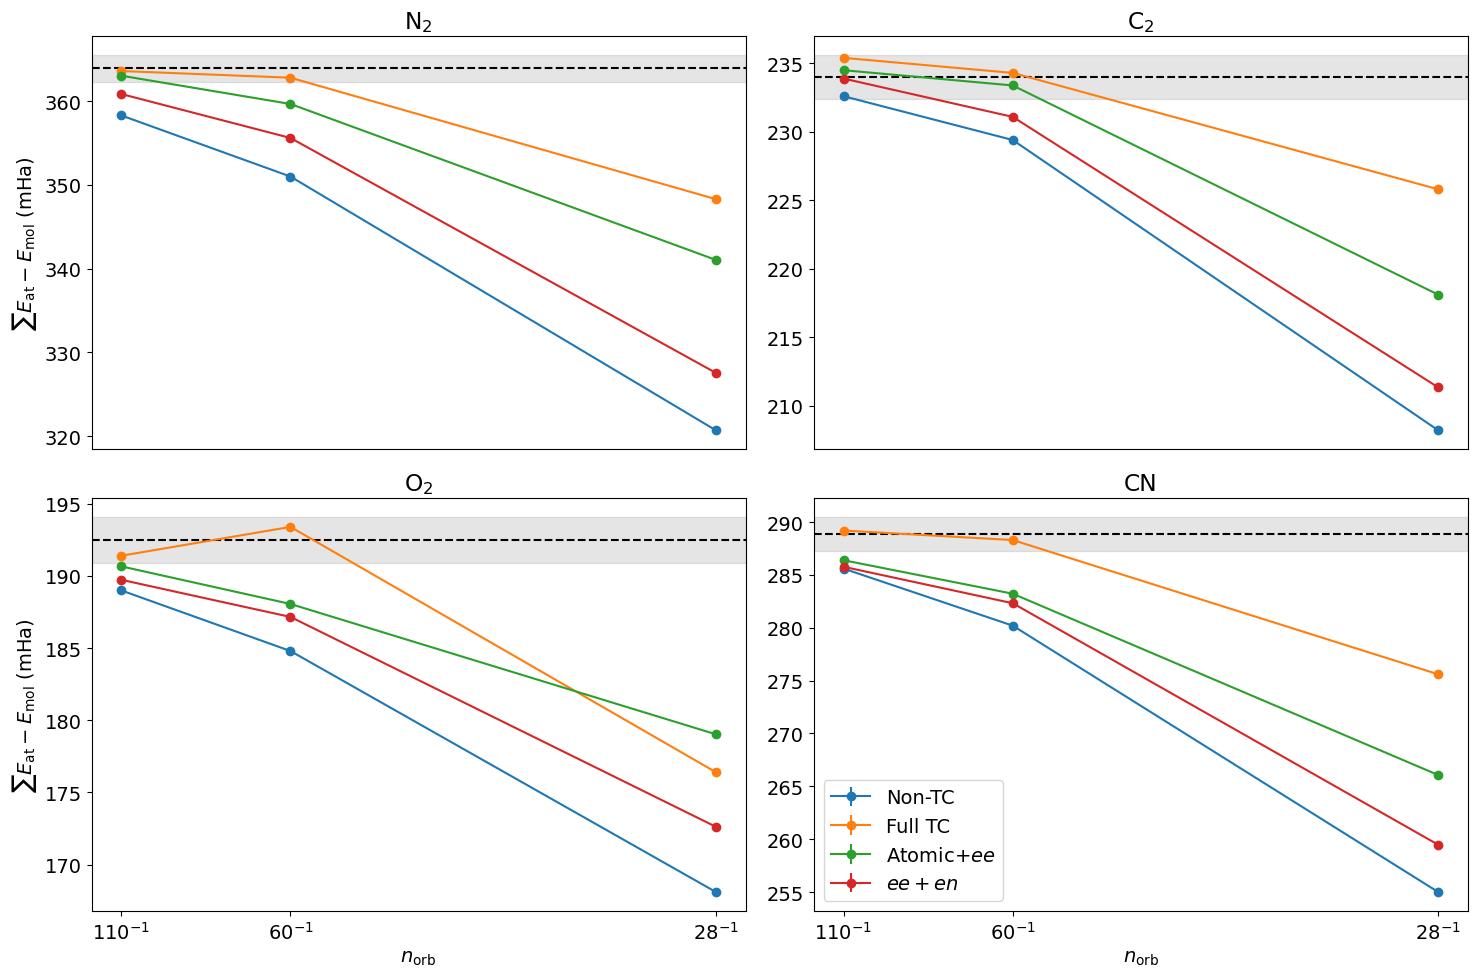

In [42]:


with plt.rc_context({'font.size': 14}):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # First plot
    # axs[0, 0].plot(data_gauss[:,0], data_gauss[:,1], '.-', label="xTC-RHF")
    # axs[0, 0].plot(data_gauss[:,0], data_gauss[:,2], '.-', label="xTC-MP2")
    # axs[0, 0].plot(data_gauss[:,0], [x.n for x in data_gauss[:,3]], '.-', label="xTC-FCIQMC")
    # axs[0, 0].set_ylabel(r"Energy (Hartree)")
    # axs[0, 0].legend()
    acc = 0
    for system in diff_full.keys()[:-1]: # exclude norb
        if system[1] == '2':
            systitle = system[0] + r"$_2$"
        else:
            systitle = system
        print(system, acc)
        r = acc // 2
        c = acc % 2
#          label="Non-TC")
#  label="Full TC")
# abel=r"Atomic($n$) + $ee$")
#  label=r"Atomic + $ee$")
# abel=r"$ee+en$")
        axs[r, c].errorbar(norb_rec,
                           [x.n for x in diff_notc[system]],
                           yerr=[x.s for x in diff_notc[system]],
                           fmt='o-', label="Non-TC"
                           )
        axs[r, c].errorbar(norb_rec,
                           [x.n for x in diff_full[system]],
                           yerr=[x.s for x in diff_full[system]],
                           fmt='o-', label="Full TC"
                           )
        # axs[r, c].errorbar(norb_rec,
        #                    [x.n for x in diff_Aee[system]],
        #                    yerr=[x.s for x in diff_Aee[system]],
        #                    fmt='o-', label=r"Atomic($n$)+$ee$"
        #                    )
        axs[r, c].errorbar(norb_rec,
                           [x.n for x in diff_Aee2[system]],
                           yerr=[x.s for x in diff_Aee2[system]],
                           fmt='o-', label=r"Atomic+$ee$"
                           )
        axs[r, c].errorbar(norb_rec,
                           [x.n for x in diff_uni[system]],
                           yerr=[x.s for x in diff_uni[system]],
                           fmt='o-', label=r"$ee+en$"
                           )
        axs[r, c].axhline(exact[system], color="black", linestyle="--")
        axs[r, c].axhspan(exact[system]-1.6, exact[system]+1.6, alpha=0.2, color='gray')
        axs[r, c].set_title(systitle)
        if r == 1:
            axs[r, c].set_xlabel(r"$n_{\rm orb}$")
        if c == 0:
            axs[r, c].set_ylabel(r"$\sum E_{\rm at} - E_{\rm mol}$ (mHa)")


        acc += 1
    plt.legend()
    axs[1, 0].set_xticks([1/28, 1/60, 1/110])
    axs[1, 0].set_xticklabels([r"$28^{-1}$", r"$60^{-1}$", r"$110^{-1}$"])
    axs[1, 1].set_xticks([1/28, 1/60, 1/110])
    axs[1, 1].set_xticklabels([r"$28^{-1}$", r"$60^{-1}$", r"$110^{-1}$"])
    axs[0, 0].set_xticks([], [])
    axs[0, 1].set_xticks([], [])
    plt.tight_layout()
    plt.savefig("atomisation_energies.pdf")

Potential outlook? (x)TC for en and een cusps combined with F12 for ee cusps? Since the technology exists there already

Running C and O atoms now (non TC) as well as O2, CN, C2 (non TC) {mol}_s?

also running the same systems with the ee+en universal jastrows
/algpfs1/phaupt/neci/meanfield/bind/size_consistent/O_universal_casino_fullcurve_eeLgaussian0.3_s2/ccpvtz/0.0 etc